In [6]:
import pandas as pd
import numpy as np
import qiskit.pulse as pulse
import matplotlib.pyplot as plt
import functools
import shutil
import tqcsf.file
from more_itertools import powerset
import qiskit.circuit as circuit
from itertools import product
from qiskit.providers.tergite import Tergite
from qiskit.visualization.pulse_v2.stylesheet import IQXDebugging
import helpers

In [2]:
chalmers = Tergite.get_provider()
backend = chalmers.get_backend(
    input("Please enter backend name (default: LokiOpenPulse)") or "LokiOpenPulse"
)
backend.set_options(shots=1500)
helpers.backend = backend
print(f"Loaded Tergite backend {backend.name}")

Please enter backend name (default: LokiOpenPulse)
Loaded Tergite backend LokiOpenPulse


# Resonator spectroscopy (Qubit 1)

In [3]:
header = helpers.gen_header((0,))

Name tag of sweep?	A
Amplitude start [V]?	5e-3
Amplitude stop [V]?	5e-3
Number of steps?	1

Frequency span [Hz]?	5e6
Number of steps?	70
Frequency f0 [Hz]?	6.74159e9
Defined rectangular sweep (70, 1) -> 70 schedules.


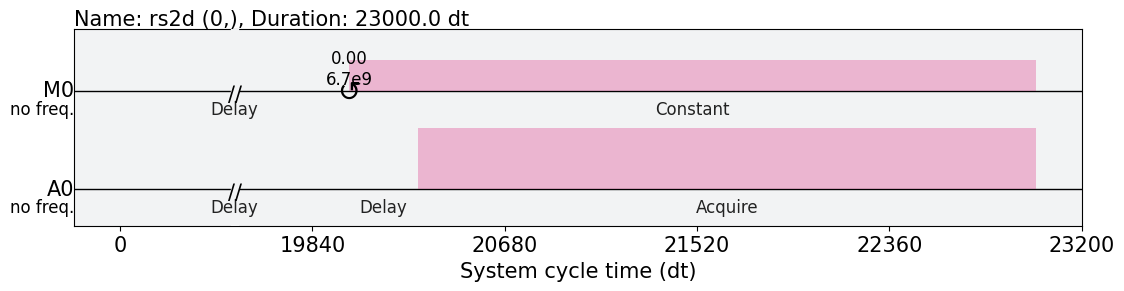

In [4]:
sweep = helpers.sweep_rs2d((0,), qobj_header=header)
sweep[2].draw(style=IQXDebugging())

In [5]:
job = backend.run(sweep, qobj_header=header, meas_level=1)

Tergite: Job has been successfully submitted


In [6]:
save_name = input("Please provide logfile name (saves in CWD): ") or str(job.job_id())
save_name = save_name + ".hdf5"
shutil.copyfile(job.logfile, save_name)
sf = tqcsf.file.StorageFile(save_name, mode="r")
ds = sf.as_xarray()
ds

Please provide logfile name (saves in CWD): A


20221018-182928-446-5ac1ed:   0%|          | 0/70 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:       (x0/slot~0: 70, x1/slot~0: 1)
Coordinates:
  * x0/slot~0     (x0/slot~0) float64 6.739e+09 6.739e+09 ... 6.744e+09
  * x1/slot~0     (x1/slot~0) float64 0.005
Data variables:
    slot~0/acq~0  (x0/slot~0, x1/slot~0) complex128 (-0.0008009773788199533-0...
Attributes:
    job_id:            f366fdaa-2e9a-4fc0-ae8d-3f0806dc444f
    meas_level:        1
    meas_return:       1
    meas_return_cols:  1
    tuid:              20221018-182928-446-5ac1ed

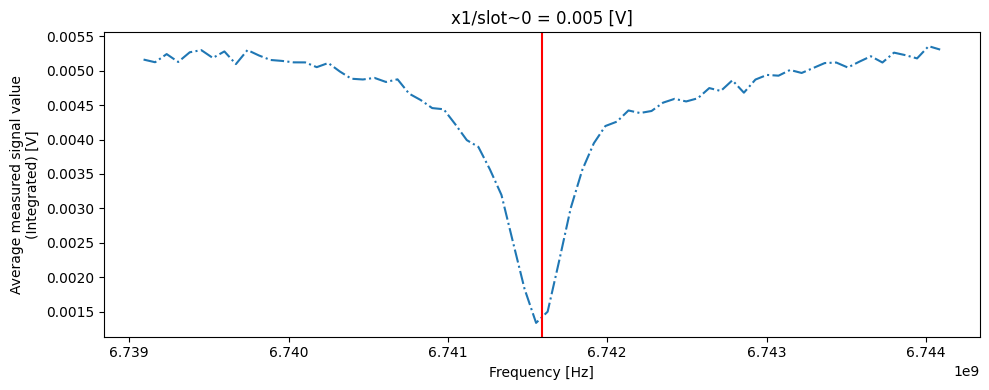

In [9]:
fig, ax = plt.subplots(1, figsize=(10, 4))
np.abs(ds["slot~0/acq~0"]).plot(ax=ax, ls="-.")
ax.axvline(6.74159e9, c="red")
fig.tight_layout()

# Qubit spectroscopy (Qubit 1)

In [48]:
headerB = helpers.gen_header((0,))

Name tag of sweep?	B5
Amplitude start [V]?	90e-3
Amplitude stop [V]?	90e-3
Number of steps?	1

Frequency span [Hz]?	10e6
Number of steps?	70
Frequency f0 [Hz]?	3.74806e9
Defined rectangular sweep (70, 1) -> 70 schedules.


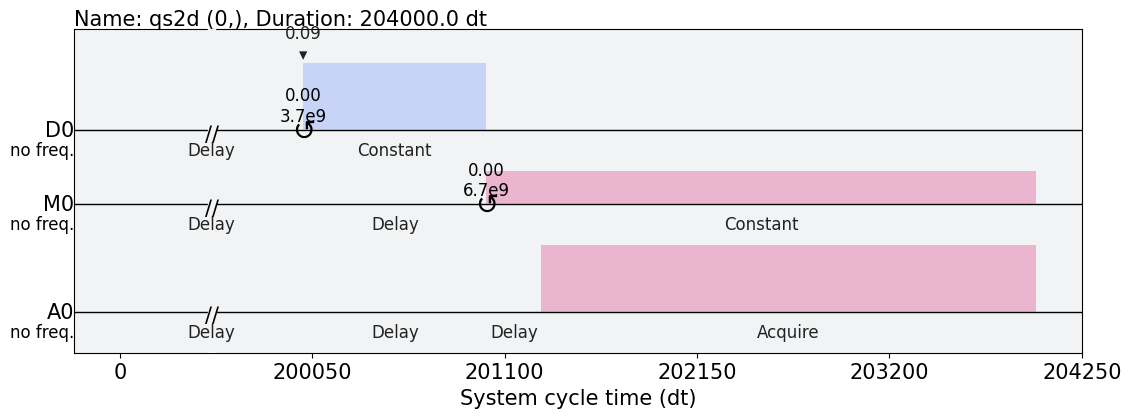

In [49]:
sweepB = helpers.sweep_qs2d(
    (0,), qobj_header=headerB, ro_freq_Hz=(6.74159e9,), ro_amp_V=(5e-3,)
)
sweepB[2].draw(style=IQXDebugging())

In [50]:
job = backend.run(sweepB, qobj_header=headerB, meas_level=1)

Tergite: Job has been successfully submitted


In [51]:
save_name = input("Please provide logfile name (saves in CWD): ") or str(job.job_id())
save_name = save_name + ".hdf5"
shutil.copyfile(job.logfile, save_name)
sf = tqcsf.file.StorageFile(save_name, mode="r")
ds = sf.as_xarray()
ds

Please provide logfile name (saves in CWD): B5


20221018-190706-241-252a5e:   0%|          | 0/70 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:       (x0/slot~0: 70, x1/slot~0: 1)
Coordinates:
  * x0/slot~0     (x0/slot~0) float64 3.743e+09 3.743e+09 ... 3.753e+09
  * x1/slot~0     (x1/slot~0) float64 0.09
Data variables:
    slot~0/acq~0  (x0/slot~0, x1/slot~0) complex128 (-0.00022254754869366193+...
Attributes:
    job_id:            1b5e48c0-0c9b-4823-88b1-c537b2dd3b48
    meas_level:        1
    meas_return:       1
    meas_return_cols:  1
    tuid:              20221018-190706-241-252a5e

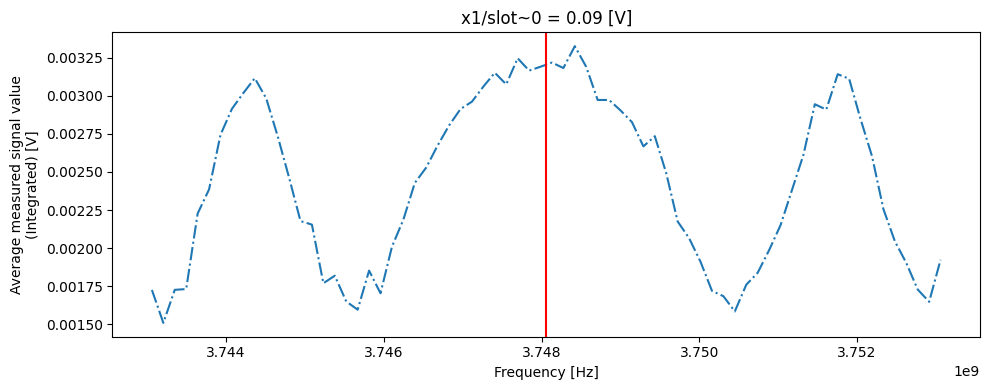

In [53]:
fig, ax = plt.subplots(1, figsize=(10, 4))
np.abs(ds["slot~0/acq~0"]).plot(ax=ax, ls="-.")
ax.axvline(3.74806e9, c="red")
fig.tight_layout()

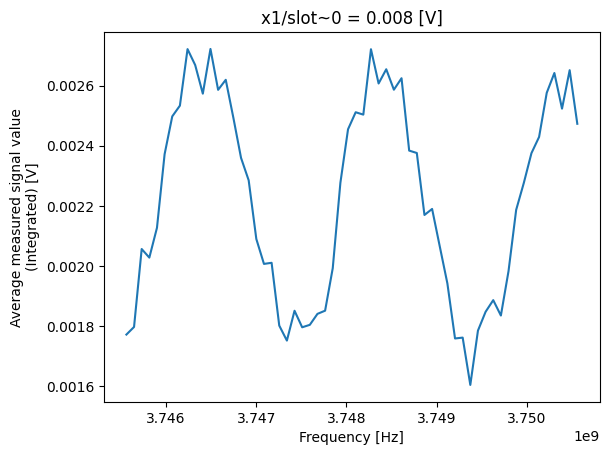

In [36]:
np.abs(ds["slot~0/acq~0"])[:, -1].plot()

# Rabi oscillations (Qubit 1)